In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

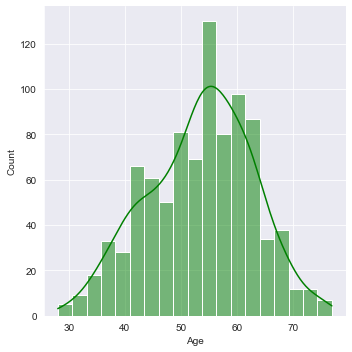

In [6]:
sns.displot(df['Age'], kde = True, color="green")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

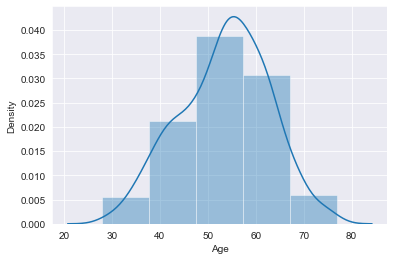

In [7]:
sns.distplot(df['Age'], kde = 'False', hist='True', bins =5)

In [8]:
df.head()
df['Sex'].unique()
count = 0
for i in df['Sex']:
    if i == 'F':
        count += 1
print(count)

193


In [9]:
df["Sex"].describe()

count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

In [10]:
len(df[df['Sex'] == 'F'])

193

<AxesSubplot:ylabel='None'>

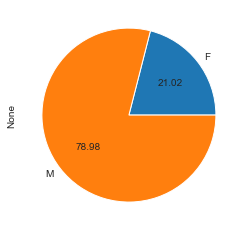

In [11]:
df.groupby(['Sex']).size().plot(kind = 'pie', autopct = '%.2f')

In [12]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [13]:
ChestPain = {}
for name in df['ChestPainType'].unique():
    count = 0
    for i in df['ChestPainType']:
        if i == name:
            count += 1
    ChestPain[name] = count
ChestPain

{'ATA': 173, 'NAP': 203, 'ASY': 496, 'TA': 46}

In [14]:
df.groupby(['ChestPainType']).size()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64

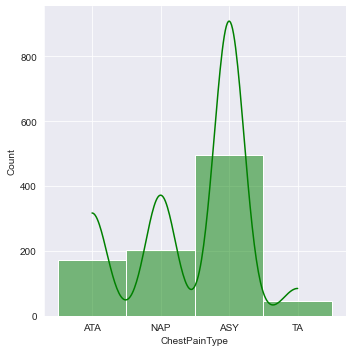

In [15]:
sns.displot(df['ChestPainType'], kde = 'True', color = 'green')

<AxesSubplot:ylabel='None'>

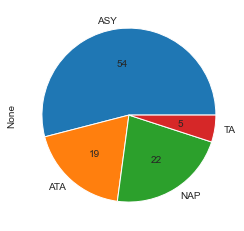

In [16]:
df.groupby(['ChestPainType']).size().plot(kind = 'pie', autopct ='%.0f')

Violin Plot

In [17]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

<AxesSubplot:xlabel='HeartDisease', ylabel='Sex'>

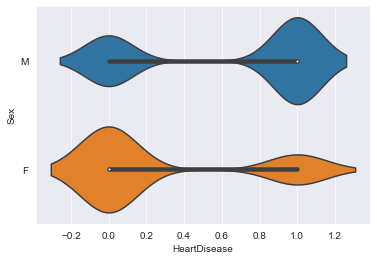

In [18]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

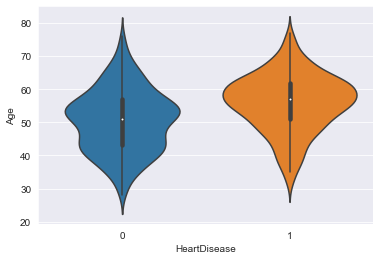

In [19]:
sns.violinplot(y =df['Age'] , x = df['HeartDisease'])

HeatMap

In [20]:
df.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

<AxesSubplot:>

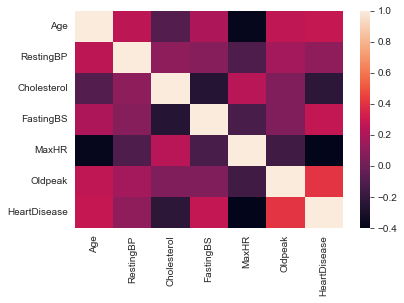

In [21]:
sns.heatmap(df.corr())

Joint Plot

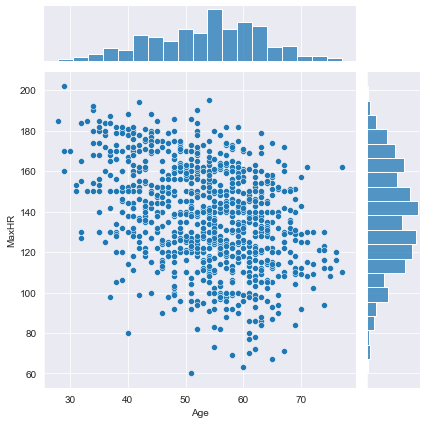

In [22]:
sns.jointplot(x= 'Age', y = 'MaxHR', data = df)

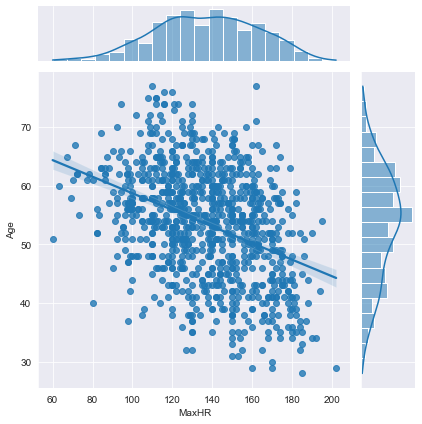

In [23]:
sns.jointplot(x='MaxHR' ,y='Age' , data = df, kind = 'reg')

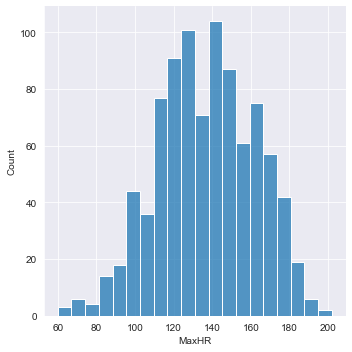

In [24]:
sns.displot(df['MaxHR'])

Pair Plot

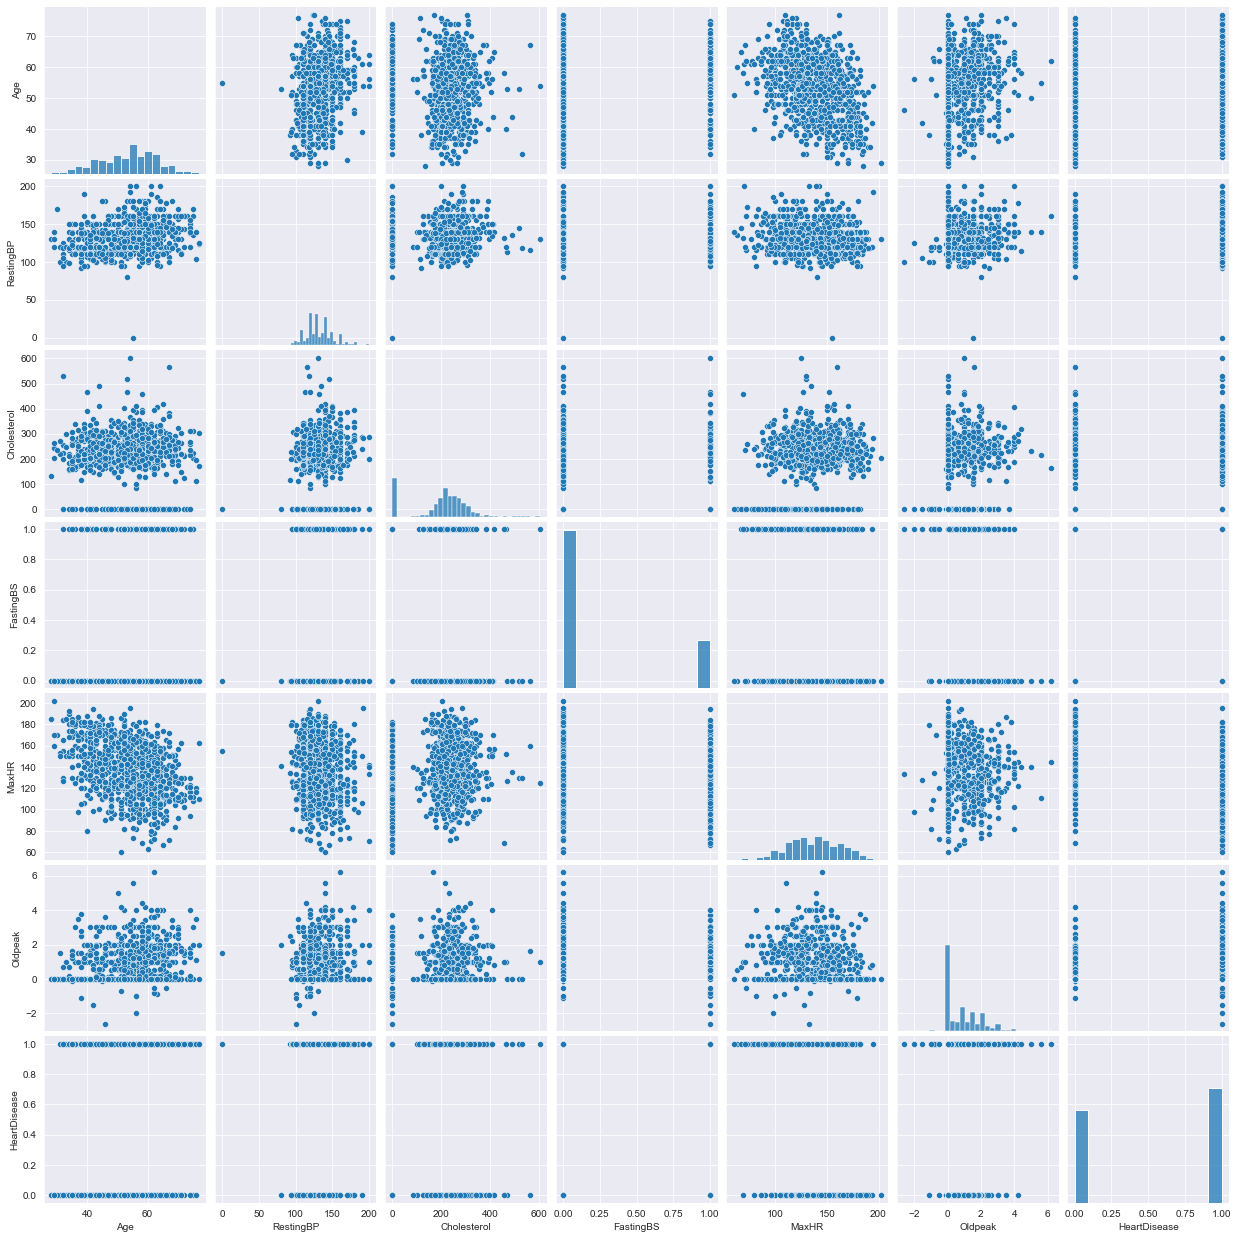

In [25]:
sns.pairplot(df)